# simple transfer learning

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [22]:
train_path = "/home/mayank/Desktop/datasets/training_set"
test_path = "/home/mayank/Desktop/datasets/test_set"

In [23]:
IMAGE_SIZE=[224,224]

In [24]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [25]:
for layer in resnet50.layers:
  layer.trainable = False

In [26]:
folders = glob('/home/mayank/Desktop/datasets/training_set/*')

In [27]:
x = Flatten()(resnet50.output)

In [28]:
prediction = Dense(len(folders), activation='softmax')(x)

In [29]:
# create a model object
model = Model(inputs=resnet50.input, outputs=prediction)

In [30]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [37]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [39]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [40]:
training_set = train_datagen.flow_from_directory('/home/mayank/Desktop/datasets/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 23 images belonging to 2 classes.


In [41]:
test_set = test_datagen.flow_from_directory('/home/mayank/Desktop/datasets/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 8 images belonging to 2 classes.


In [42]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
1/1 [==============================] - 12s 12s/step - loss: 1.1053 - accuracy: 0.6087 - val_loss: 9.6865 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 5s 5s/step - loss: 12.1359 - accuracy: 0.3913 - val_loss: 5.8887 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 4s 4s/step - loss: 7.3277 - accuracy: 0.3913 - val_loss: 1.0686 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 5s 5s/step - loss: 0.8838 - accuracy: 0.6087 - val_loss: 4.6076 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 5s 5s/step - loss: 3.5687 - accuracy: 0.6087 - val_loss: 5.2016 - val_accuracy: 0.5000


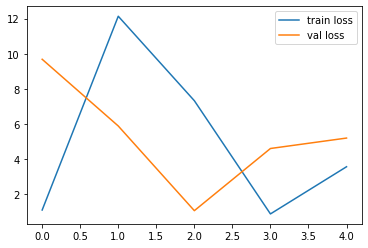

<Figure size 432x288 with 0 Axes>

In [43]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

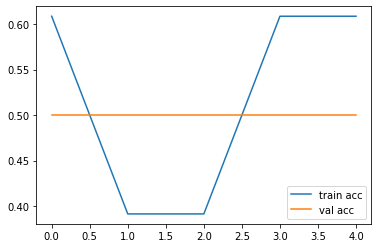

<Figure size 432x288 with 0 Axes>

In [44]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')